In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import math
from utils import *
import argparse
from matplotlib.legend_handler import HandlerLine2D

In [21]:
working_dir_list = [
    'result/GPT_3x_to_x_for_paper/3x_to_x-seed_1-N_2000',
    'result/zzw_acc_loss/reading_comprehension',
    'result/zzw_acc_loss/classification',
    'result/zzw_acc_loss/composition',
    'result/zzw_acc_loss/working_memory',
    'result/GPT_近义词学习_验证加入近义词与单纯扩张数据量的效果对比/near_synonym-seed_1-N_20000-add_prompt3_data',
    'result/GPT_context_for_paper/context-seed_1-N_4000',
    'result/GPT_3x_to_x_4x_to_x+1_two_interval/3x_to_x_4x_to_x+1_two_interval-seed_1-N_2000-4layer_4head_区间20-60_区间60-100',
    'result/GPT_3x_to_x_or_x+1_依概率输出/3x_to_x_probability-seed_1-N_1800-80概率x_20概率x+1',
]

title_list = [
    'Identity learning task',
    'Reading comprehension task',
    'Classification task',
    'Composition task',
    'Working memory task',
    'Synonym task',
    'Forward-reverse recitation task',
    'Multi-anchor task',
    'Statistical output task'
]

loss and acc plot saved to result/all_task_loss.png


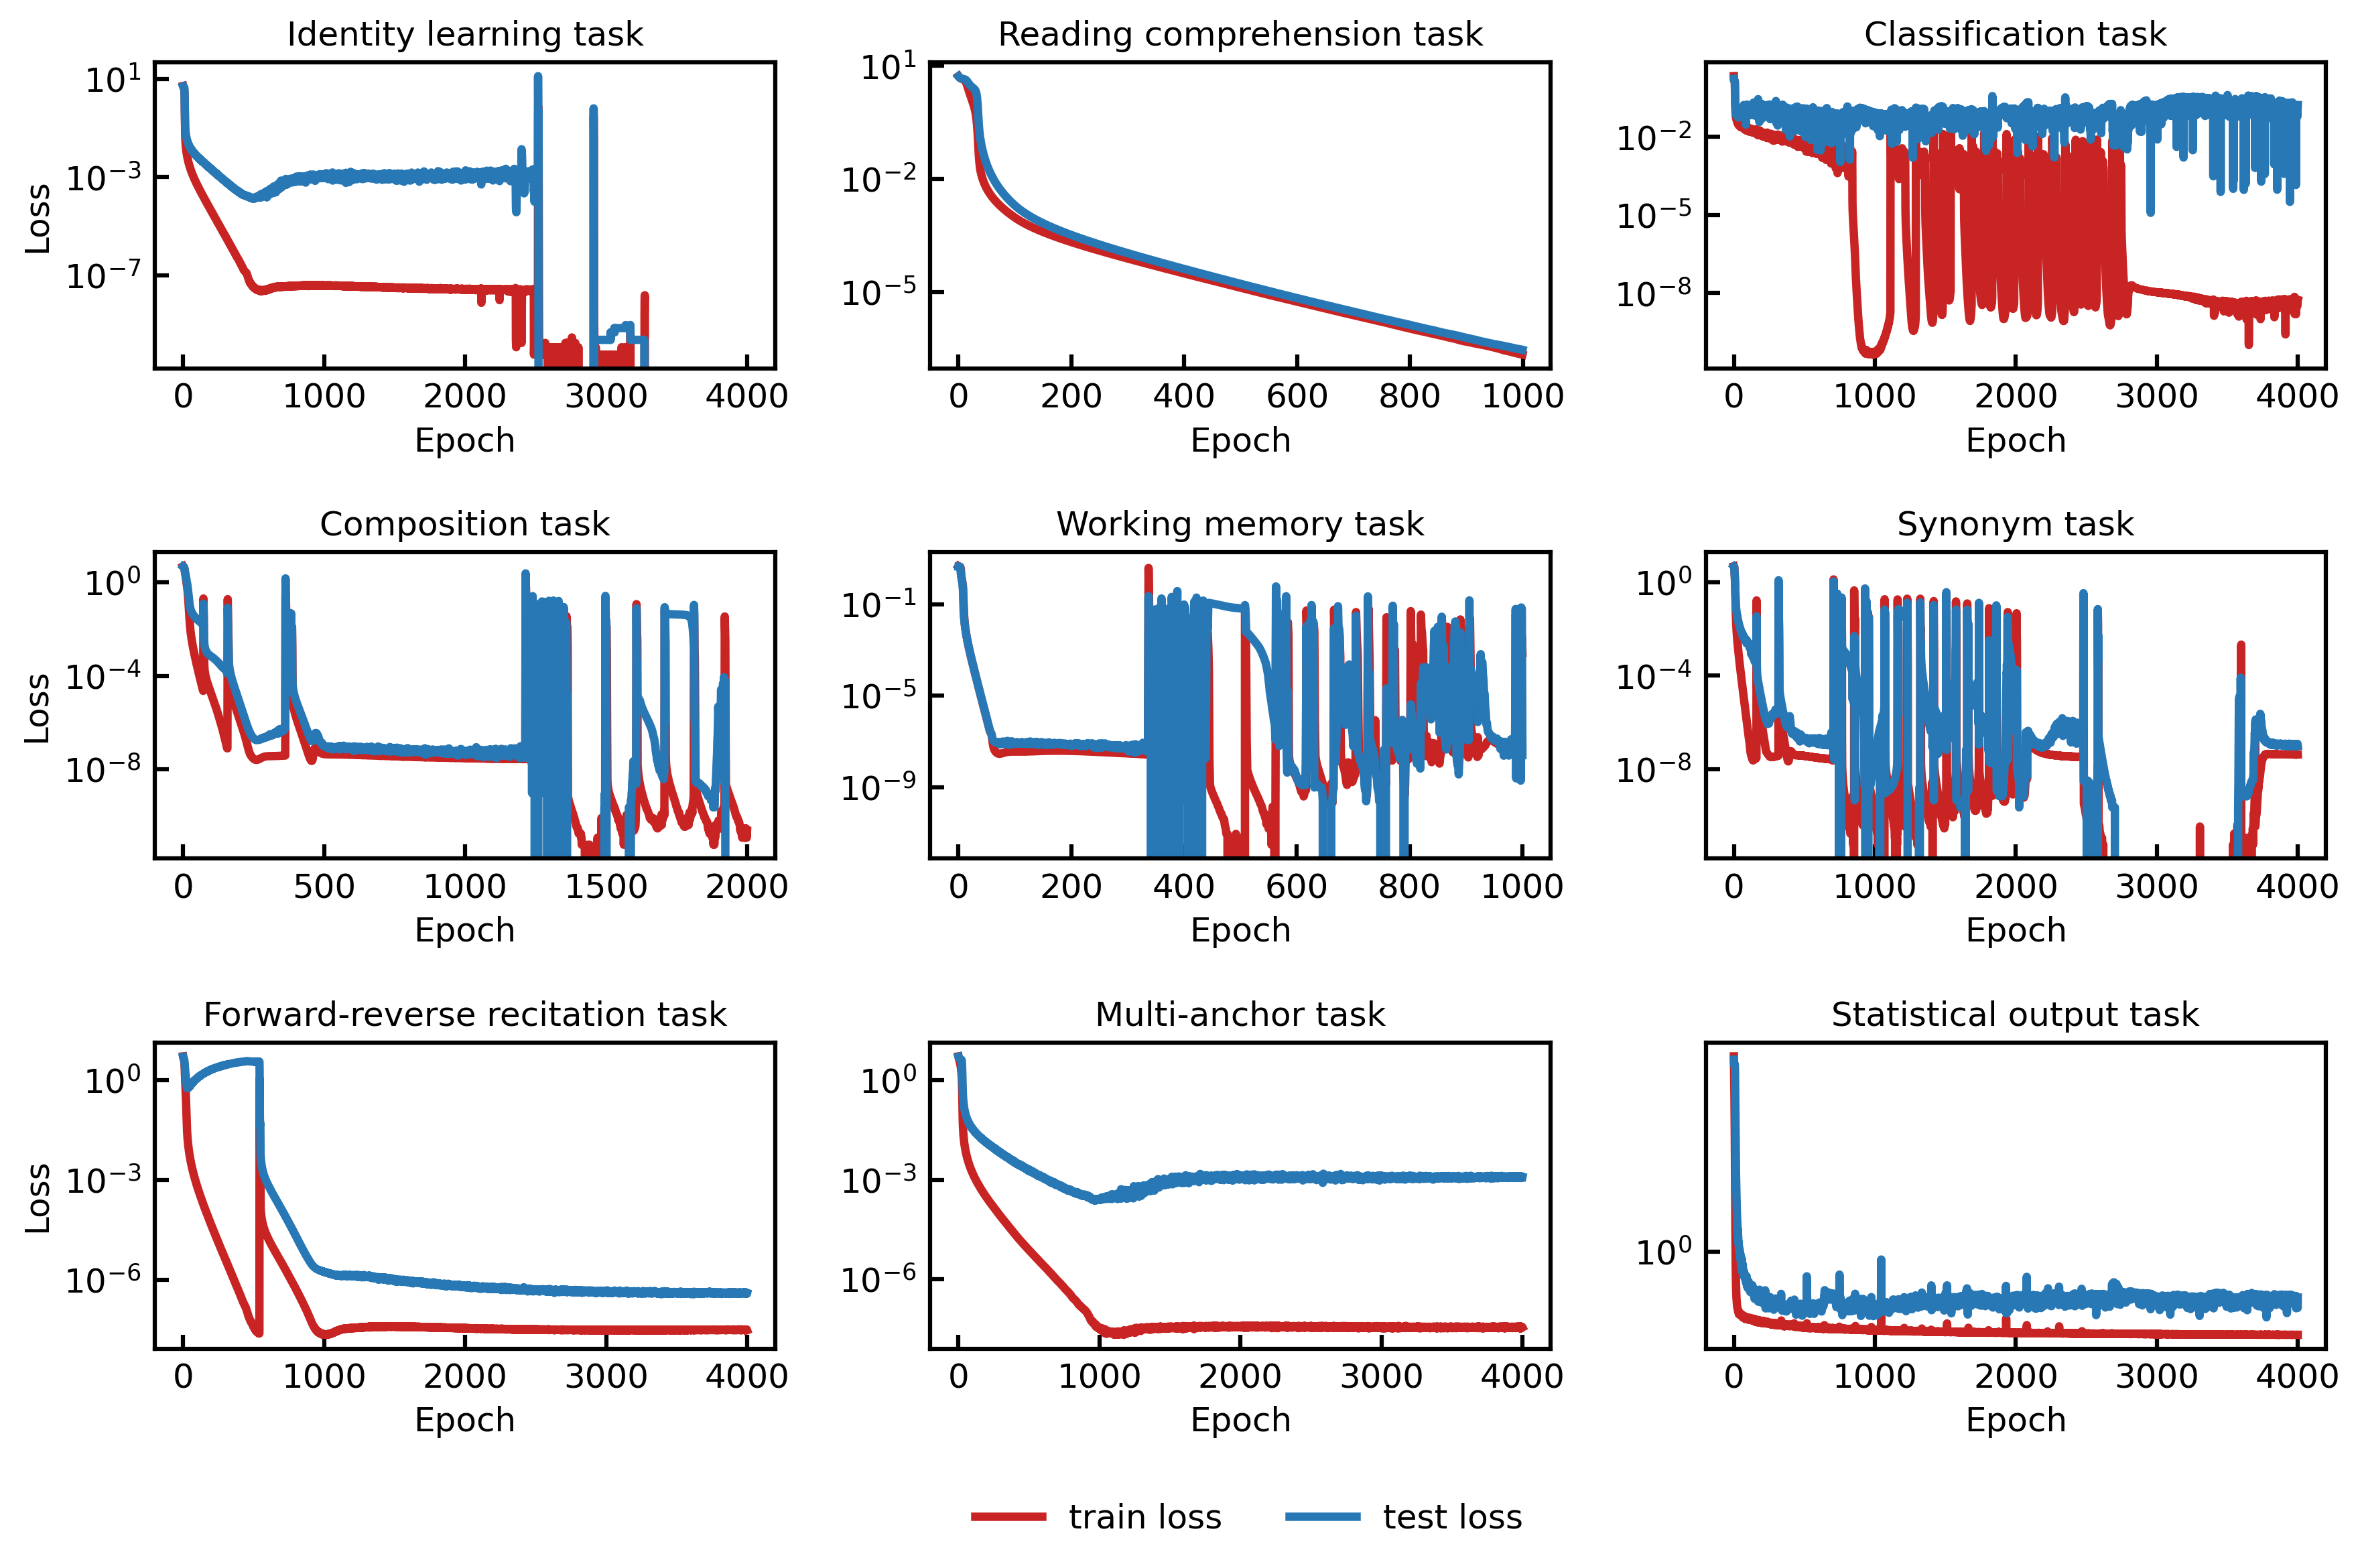

In [20]:
fig = plt.figure(figsize=(12, 8), dpi=300)
format_settings(ms=8, lw=3, left=0.07, right=0.97, hspace=0.6)
grid = plt.GridSpec(3, 3)
for i, working_dir in enumerate(working_dir_list):
    ax1 = fig.add_subplot(grid[i//3, i%3]) 
    try:
        train_loss_his = np.load(f'{working_dir}/loss/train_loss_his.npy')
        test_loss_his = np.load(f'{working_dir}/loss/test_loss_his.npy')
    except:
        train_loss_his = np.load(f'{working_dir}/loss/train_loss_his.npz')['train']
        test_loss_his = np.load(f'{working_dir}/loss/test_loss_his.npz')['test']

    l1, = ax1.semilogy(train_loss_his, label='train loss', color='#C82423', linestyle='-')
    l2, = ax1.semilogy(test_loss_his, label='test loss', color='#2878B5', linestyle='-')
    
    ax1.set_xlabel('Epoch')
    if i % 3 == 0:
        ax1.set_ylabel('Loss')
    ax1.set_title(title_list[i])
    if i == 7:
        ax1.legend(loc=(0.05, -0.65), frameon=False, ncol=2)
    
plt.savefig(f'result/all_task_loss.png')
print(f'loss and acc plot saved to result/all_task_loss.png')

loss and acc plot saved to result/all_task_acc.png


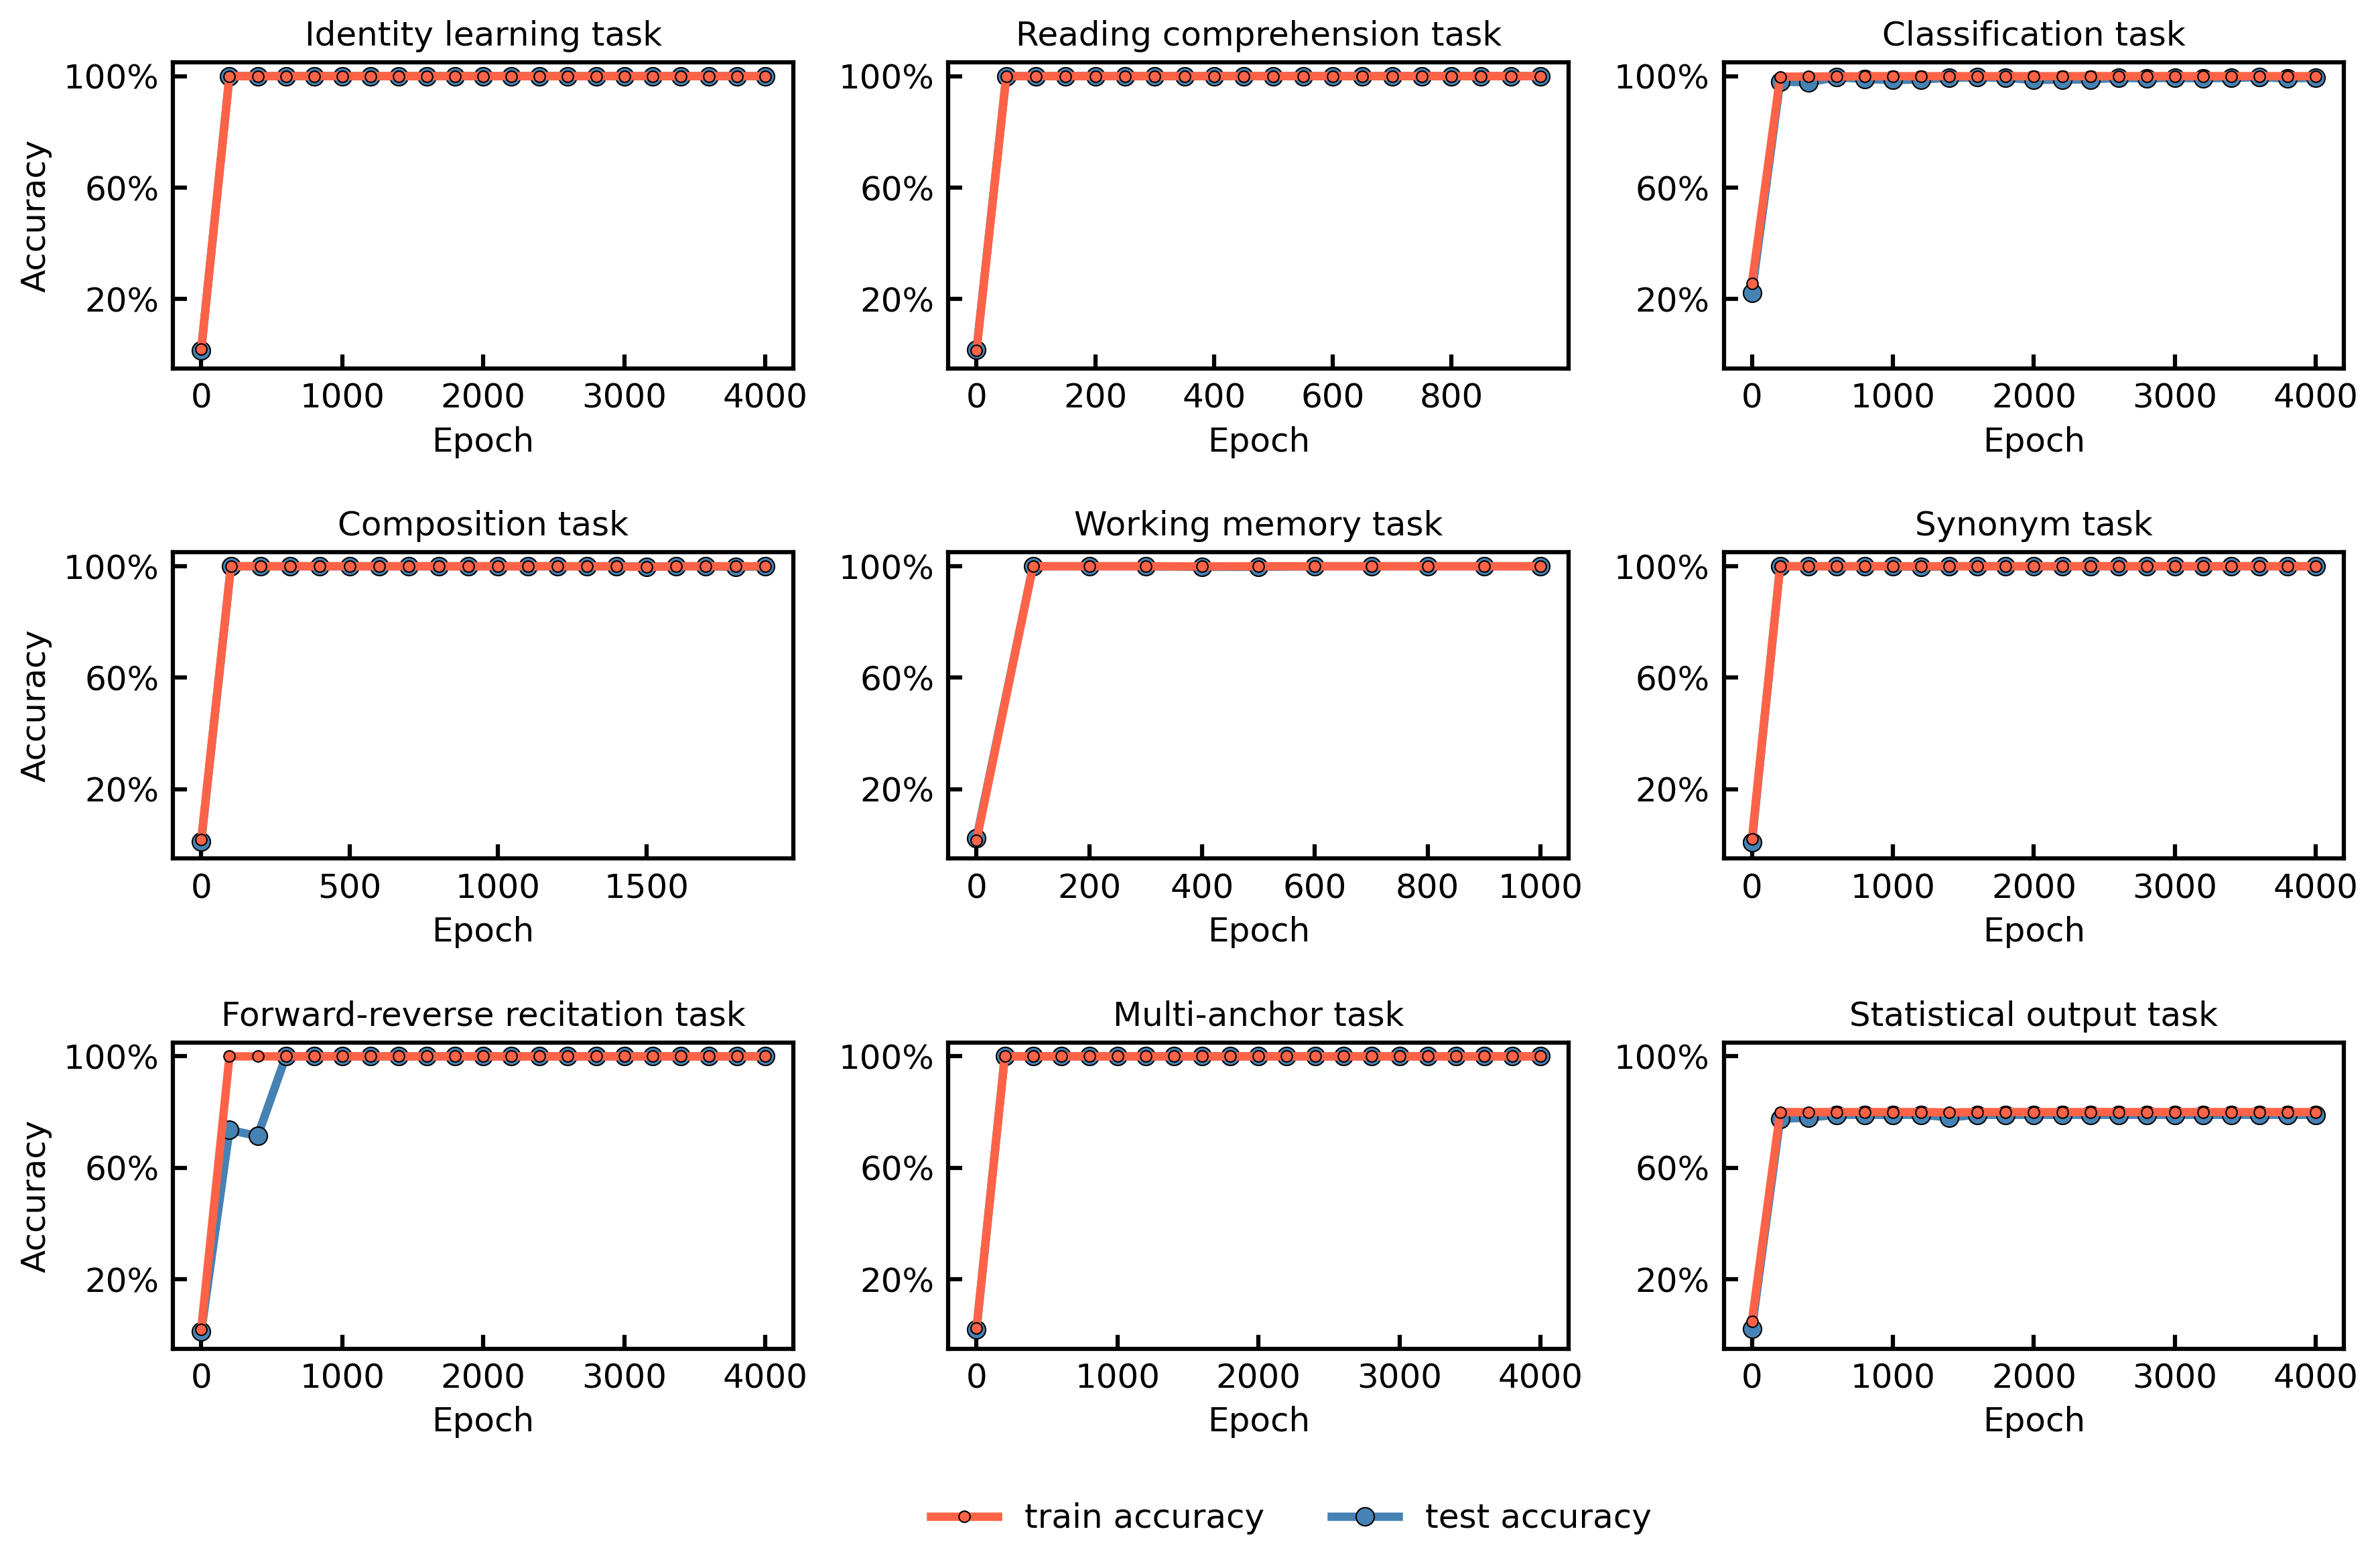

In [37]:
fig = plt.figure(figsize=(12, 8), dpi=300)
format_settings(ms=8, lw=3, left=0.07, right=0.97, hspace=0.6)
grid = plt.GridSpec(3, 3)
for i, working_dir in enumerate(working_dir_list):
    # acc 图
    ax2 = fig.add_subplot(grid[i//3, i%3]) 
    acc_epoch_his = np.load(f'{working_dir}/loss/acc_epoch_his.npy')
    try:
        acc_train_unmask_his = np.load(f'{working_dir}/loss/acc_train_unmask_his.npy')
        acc_test_unmask_his = np.load(f'{working_dir}/loss/acc_test_unmask_his.npy')
    except:
        acc_train_unmask_his = np.load(f'{working_dir}/loss/train_acc_his.npz')['train']
        acc_test_unmask_his = np.load(f'{working_dir}/loss/test_acc_his.npz')['test']
    handler_map = {}
    color_list = ['tomato', 'steelblue', 'lightsalmon', 'skyblue']
    if i in [0, 2, 5, 6, 7, 8]:
        acc_epoch_his = acc_epoch_his[::2]
        acc_train_unmask_his = acc_train_unmask_his[::2]
        acc_test_unmask_his = acc_test_unmask_his[::2]
    elif i in [1]:
        acc_epoch_his = acc_epoch_his[::50]
        acc_train_unmask_his = acc_train_unmask_his[::50]
        acc_test_unmask_his = acc_test_unmask_his[::50]
    l1, = ax2.plot(acc_epoch_his, acc_train_unmask_his, label=f'train accuracy', color=color_list[0], 
            marker = 'o', markersize=4, markeredgewidth=0.5, markeredgecolor='black', zorder=7)
    l2, = ax2.plot(acc_epoch_his, acc_test_unmask_his, label=f'test accuracy', color=color_list[1], 
            marker = 'o', markersize=6.5, markeredgewidth=0.5, markeredgecolor='black', zorder=6)

    ax2.set_yticks([0.2, 0.6, 1])
    ax2.set_yticklabels(['20%', '60%', '100%'])

    ax2.set_ylim(-0.05, 1.05)

    ax2.set_xlabel('Epoch')
    if i % 3 == 0:
        ax2.set_ylabel('Accuracy')
    ax2.set_title(title_list[i])
    if i == 7:
        ax2.legend(loc=(-0.05, -0.65), frameon=False, ncol=2)
    
plt.savefig(f'result/all_task_acc.png')
print(f'loss and acc plot saved to result/all_task_acc.png')